In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
url1="https://in.finance.yahoo.com/quote/TATASTEEL.NS/history?period1=820454400&period2=1620172800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true"
url2="https://in.finance.yahoo.com/quote/RELIANCE.NS/history?period1=820454400&period2=1620172800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true"
url3="https://in.finance.yahoo.com/quote/DRREDDY.BO/history?period1=699494400&period2=1620172800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true"

In [3]:
TATASTEEL = requests.get(url1, stream=True).text
soup1 = BeautifulSoup(TATASTEEL,'html.parser')

In [4]:
table = soup1.find_all('table')
TS= pd.read_html(str(table))[0]

In [5]:
RELIANCE = requests.get(url2).text
soup2= BeautifulSoup(RELIANCE,'html.parser')

In [6]:
table = soup2.find_all('table')
RL= pd.read_html(str(table))[0]

In [7]:
DRREDDY = requests.get(url3).text
soup3 = BeautifulSoup(DRREDDY,'html.parser')


In [8]:
table = soup3.find_all('table')
DR = pd.read_html(str(table))[0]

In [9]:
RL.head(5)

Date     Open     High      Low   Close* Adj. close**     Volume
0  01-May-2021  1966.00  1979.00  1906.60  1931.00      1931.00   33462565
1  01-Apr-2021  2018.00  2046.90  1876.70  1994.50      1994.50  150993414
2  01-Mar-2021  2110.20  2231.90  1973.70  2003.10      2003.10  194133090
3  01-Feb-2021  1859.40  2152.00  1848.00  2085.80      2085.80  241126674
4  01-Jan-2021  1988.00  2120.00  1830.00  1841.95      1841.95  300050658

In [10]:
DR.head(5)

Date     Open     High      Low   Close* Adj. close**   Volume
0  01-May-2021  5200.00  5250.80  5055.75  5165.65      5165.65   211490
1  01-Apr-2021  4535.00  5290.00  4423.20  5164.30      5164.30  1517707
2  01-Mar-2021  4478.90  4582.85  4135.90  4515.60      4515.60   805451
3  01-Feb-2021  4577.20  4909.30  4261.00  4424.60      4424.60  1524206
4  01-Jan-2021  5228.00  5443.35  4550.00  4598.65      4598.65   841355

In [11]:
TS.head(5)

Date     Open     High      Low   Close* Adj. close**     Volume
0  01-May-2021  1031.95  1129.00  1018.50  1100.90      1100.90  117130104
1  01-Apr-2021   821.00  1052.60   819.00  1034.00      1034.00  504524514
2  01-Mar-2021   724.00   823.50   681.25   811.85       811.85  420184635
3  01-Feb-2021   604.90   753.00   597.45   715.15       715.15  471314897
4  01-Jan-2021   645.00   731.50   596.00   601.00       601.00  433068703

In [12]:
DR.tail(5)

Date  \
96                                         01-Dec-2013   
97                                         01-Nov-2013   
98                                         01-Oct-2013   
99                                         01-Sep-2013   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
96                                             2484.00   
97                                             2445.00   
98                                             2395.65   
99                                             2272.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  High  \
96                                             2554.00   
97                                             2498.70   
98                                             2545.00   
99                                             2471.70   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                   Low  \
96                                             2393.15   
97                                             2313.00   
98                                             2350.00   
99                                             2161.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Close*  \
96                                             2533.05   
97                                             2484.85   
98                                             2455.95   
99                                             2383.65   
100  *Close price adjusted for splits.**Adjusted cl...   

                                          Adj. close**  \
96                                             2414.51   
97                                             2368.57   
98                                             2341.02   
99                                             2272.10   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Volume  
96                                              216118  
97                                              307521  
98                                              561434  
99                                              438526  
100  *Close price adjusted for splits.**Adjusted cl...

In [13]:
TS.tail(5)

Date  \
96                                         01-Dec-2013   
97                                         01-Nov-2013   
98                                         01-Oct-2013   
99                                         01-Sep-2013   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
96                                              381.19   
97                                              319.17   
98                                              261.29   
99                                              262.05   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  High  \
96                                              411.53   
97                                              386.24   
98                                              327.65   
99                                              303.73   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                   Low  \
96                                              377.28   
97                                              315.98   
98                                              256.14   
99                                              253.57   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Close*  \
96                                              404.15   
97                                              381.67   
98                                              319.07   
99                                              258.72   
100  *Close price adjusted for splits.**Adjusted cl...   

                                          Adj. close**  \
96                                              345.06   
97                                              325.86   
98                                              272.42   
99                                              220.89   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Volume  
96                                            90609345  
97                                           137634968  
98                                           141870545  
99                                           140100970  
100  *Close price adjusted for splits.**Adjusted cl...

In [14]:
RL.tail(5)

Date  \
96                                         01-Jan-2014   
97                                         01-Dec-2013   
98                                         01-Nov-2013   
99                                         01-Oct-2013   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
96                                              444.51   
97                                              422.50   
98                                              450.78   
99                                              409.27   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  High  \
96                                              444.91   
97                                              450.23   
98                                              458.92   
99                                              454.69   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                   Low  \
96                                              407.24   
97                                              414.45   
98                                              413.70   
99                                              405.01   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Close*  \
96                                              411.67   
97                                              443.40   
98                                              422.59   
99                                              453.06   
100  *Close price adjusted for splits.**Adjusted cl...   

                                          Adj. close**  \
96                                              390.16   
97                                              420.23   
98                                              400.51   
99                                              429.38   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Volume  
96                                           130829046  
97                                            98765258  
98                                            91816427  
99                                           125905292  
100  *Close price adjusted for splits.**Adjusted cl...

In [15]:
# We have to remove the 100th row

In [16]:
RL=RL.drop([100], axis=0)

In [17]:
TS=TS.drop([100], axis=0)

In [18]:
DR=DR.drop([100], axis=0)

In [19]:
TS['Date'] = pd.to_datetime(TS['Date'], format="%d-%b-%Y")
RL['Date'] = pd.to_datetime(RL['Date'], format="%d-%b-%Y")
DR['Date'] = pd.to_datetime(DR['Date'], format="%d-%b-%Y")
#converting to date time format

In [20]:
RL.head()

Date     Open     High      Low   Close* Adj. close**     Volume
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658

In [21]:
DR.head()

Date     Open     High      Low   Close* Adj. close**   Volume
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355

In [22]:
TS.head()

Date     Open     High      Low   Close* Adj. close**     Volume
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703

In [23]:
TS=TS[pd.to_numeric(TS['High'], errors='coerce').notnull()]
#removing the dividend row

In [24]:
TS

Date     Open     High      Low   Close* Adj. close**     Volume
0  2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104
1  2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514
2  2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635
3  2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897
4  2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703
..        ...      ...      ...      ...      ...          ...        ...
95 2014-01-01   404.91   414.92   325.07   339.22       289.62   89915865
96 2013-12-01   381.19   411.53   377.28   404.15       345.06   90609345
97 2013-11-01   319.17   386.24   315.98   381.67       325.86  137634968
98 2013-10-01   261.29   327.65   256.14   319.07       272.42  141870545
99 2013-09-01   262.05   303.73   253.57   258.72       220.89  140100970

[93 rows x 7 columns]

In [25]:
RL=RL[pd.to_numeric(RL['High'], errors='coerce').notnull()]

In [26]:
RL

Date     Open     High      Low   Close* Adj. close**     Volume
0  2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565
1  2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414
2  2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090
3  2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674
4  2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658
..        ...      ...      ...      ...      ...          ...        ...
95 2014-02-01   409.22   411.00   392.83   396.22       375.52   84666249
96 2014-01-01   444.51   444.91   407.24   411.67       390.16  130829046
97 2013-12-01   422.50   450.23   414.45   443.40       420.23   98765258
98 2013-11-01   450.78   458.92   413.70   422.59       400.51   91816427
99 2013-10-01   409.27   454.69   405.01   453.06       429.38  125905292

[92 rows x 7 columns]

In [27]:
DR=DR[pd.to_numeric(DR['High'], errors='coerce').notnull()]
DR

Date     Open     High      Low   Close* Adj. close**   Volume
0  2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490
1  2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707
2  2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451
3  2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206
4  2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355
..        ...      ...      ...      ...      ...          ...      ...
95 2014-01-01  2534.00  2690.00  2460.00  2607.00      2485.00   388446
96 2013-12-01  2484.00  2554.00  2393.15  2533.05      2414.51   216118
97 2013-11-01  2445.00  2498.70  2313.00  2484.85      2368.57   307521
98 2013-10-01  2395.65  2545.00  2350.00  2455.95      2341.02   561434
99 2013-09-01  2272.00  2471.70  2161.00  2383.65      2272.10   438526

[93 rows x 7 columns]

In [28]:
TS["Close*"]=TS["Close*"].astype(float)
RL["Close*"]=RL["Close*"].astype(float)
DR["Close*"]=DR["Close*"].astype(float)

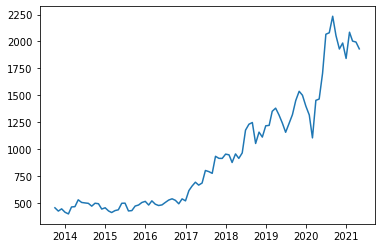

In [29]:
plt.plot(RL["Date"],RL["Close*"])

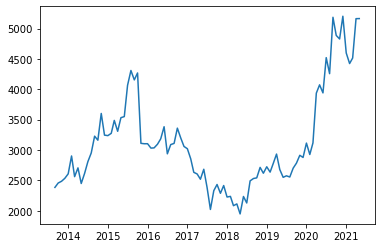

In [30]:
plt.plot(DR["Date"],DR["Close*"])

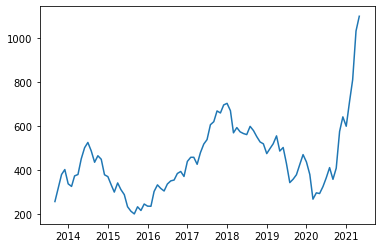

In [31]:
plt.plot(TS["Date"],TS["Close*"])

# We are going to use 5 important indicator of stock analysis
     1. Moving Average
     2. Moving average convergence divergence
     3. On Balance Volume
     4. Relative Strength index
     5. Open High Low Close Graph

# 1.1 Simple Moving Average

In [32]:
TS['SMA3'] = TS["Close*"].rolling(3).mean()
TS.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104   
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514   
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635   
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897   
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703   

         SMA3  
0         NaN  
1         NaN  
2  982.250000  
3  853.666667  
4  709.333333

In [33]:
TS.head()
import numpy as np

In [34]:
RL['SMA3'] = RL["Close*"].rolling(3).mean()

In [35]:
RL.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565   
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414   
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090   
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674   
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658   

      SMA3  
0      NaN  
1      NaN  
2  1976.20  
3  2027.80  
4  1976.95

In [36]:
DR['SMA3'] = DR["Close*"].rolling(3).mean()
DR.head()

Date     Open     High      Low   Close* Adj. close**   Volume  \
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490   
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707   
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451   
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206   
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355   

          SMA3  
0          NaN  
1          NaN  
2  4948.516667  
3  4701.500000  
4  4512.950000

Text(0, 0.5, 'Price')

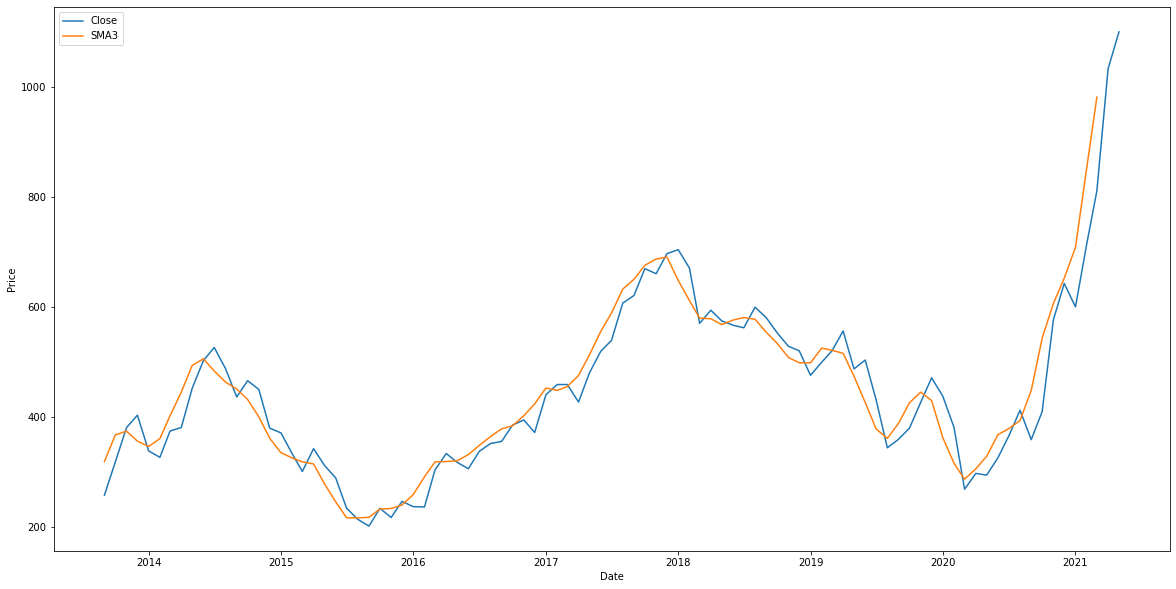

In [37]:
plt.figure(figsize=(20,10))
plt.plot(TS["Date"],TS["Close*"], label="Close")
plt.plot(TS["Date"],TS["SMA3"], label="SMA3")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")

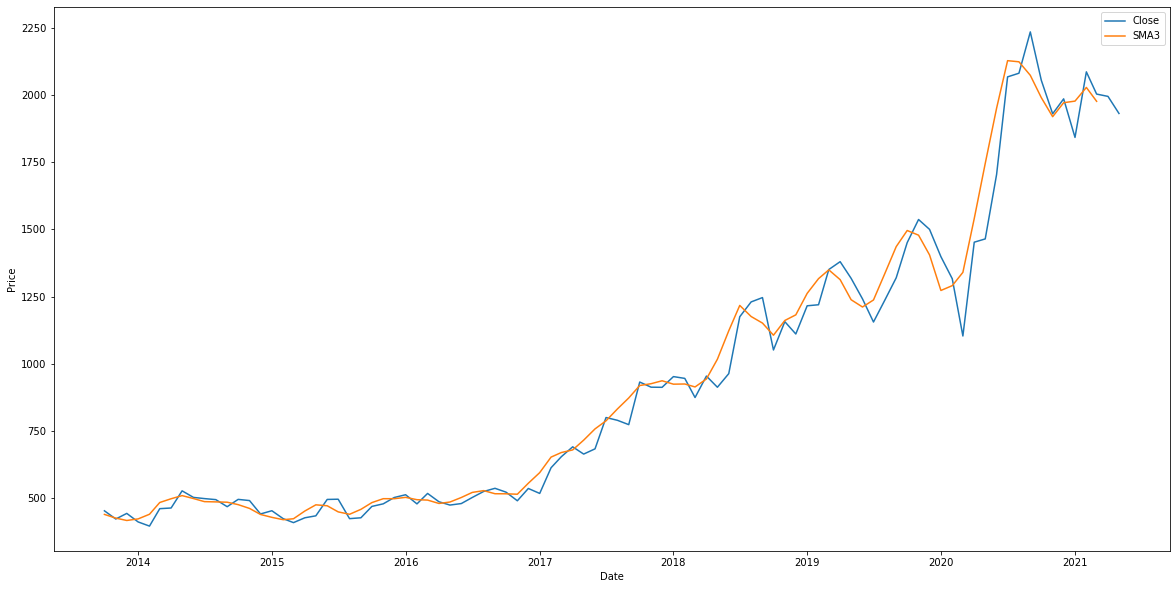

In [38]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(RL["Date"],RL["Close*"], label="Close")
plt.plot(RL["Date"],RL["SMA3"], label="SMA3")
plt.legend()

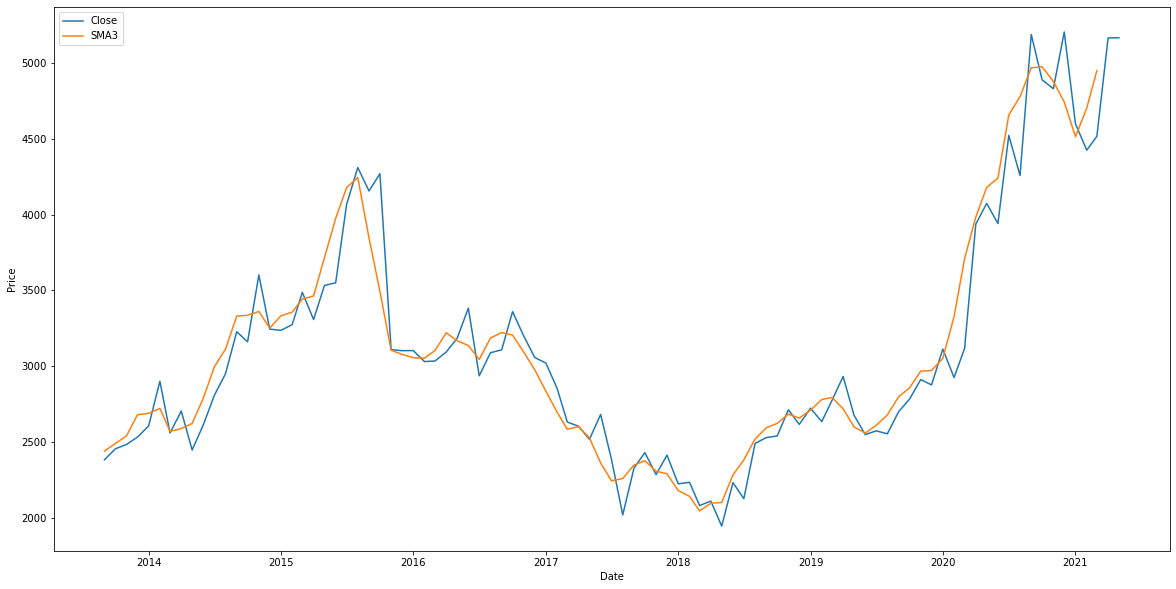

In [39]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(DR["Date"],DR["Close*"], label="Close")
plt.plot(DR["Date"],DR["SMA3"], label="SMA3")
plt.legend()

# 1.2 Exponential Moving Average


In [40]:
TS['EMA'] = TS["Close*"].ewm(span=3, adjust="false").mean()
TS.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104   
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514   
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635   
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897   
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703   

         SMA3          EMA  
0         NaN  1100.900000  
1         NaN  1056.300000  
2  982.250000   916.614286  
3  853.666667   809.166667  
4  709.333333   701.725806

In [41]:
RL['EMA'] = RL["Close*"].ewm(span=3, adjust="false").mean()
RL.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565   
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414   
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090   
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674   
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658   

      SMA3          EMA  
0      NaN  1931.000000  
1      NaN  1973.333333  
2  1976.20  1990.342857  
3  2027.80  2041.253333  
4  1976.95  1938.387097

In [42]:
DR['EMA'] = DR["Close*"].ewm(span=3, adjust="false").mean()

DR.head()

Date     Open     High      Low   Close* Adj. close**   Volume  \
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490   
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707   
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451   
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206   
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355   

          SMA3          EMA  
0          NaN  5165.650000  
1          NaN  5164.750000  
2  4948.516667  4793.807143  
3  4701.500000  4596.896667  
4  4512.950000  4597.801613

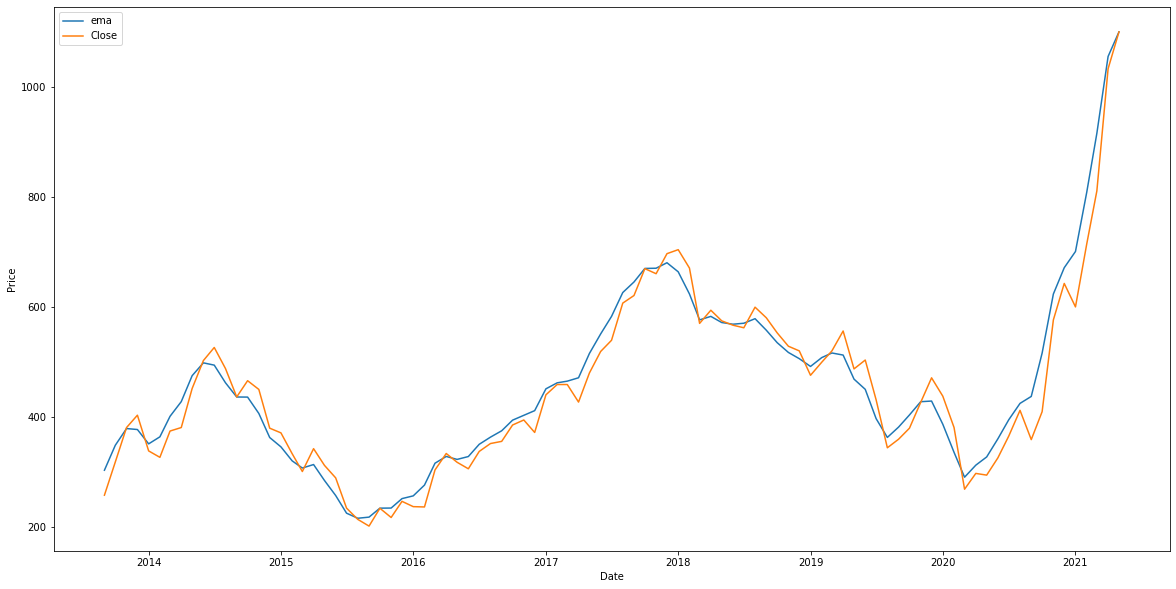

In [43]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(TS["Date"],TS["EMA"], label="ema")
plt.plot(TS["Date"],TS["Close*"], label="Close")
plt.legend()

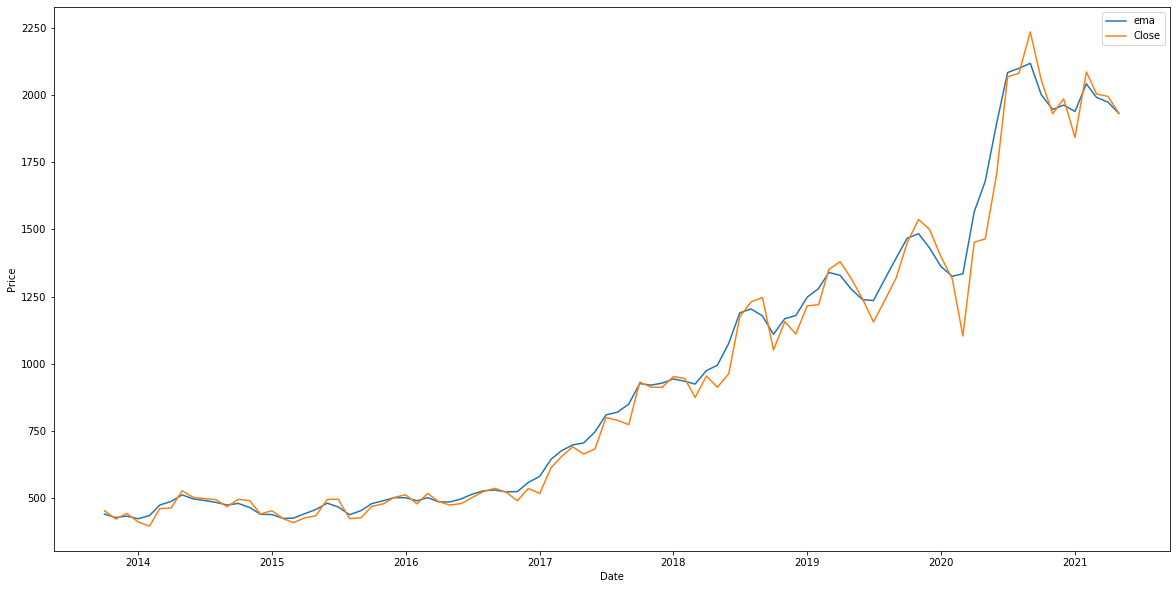

In [44]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(RL["Date"],RL["EMA"], label="ema")
plt.plot(RL["Date"],RL["Close*"], label="Close")
plt.legend()

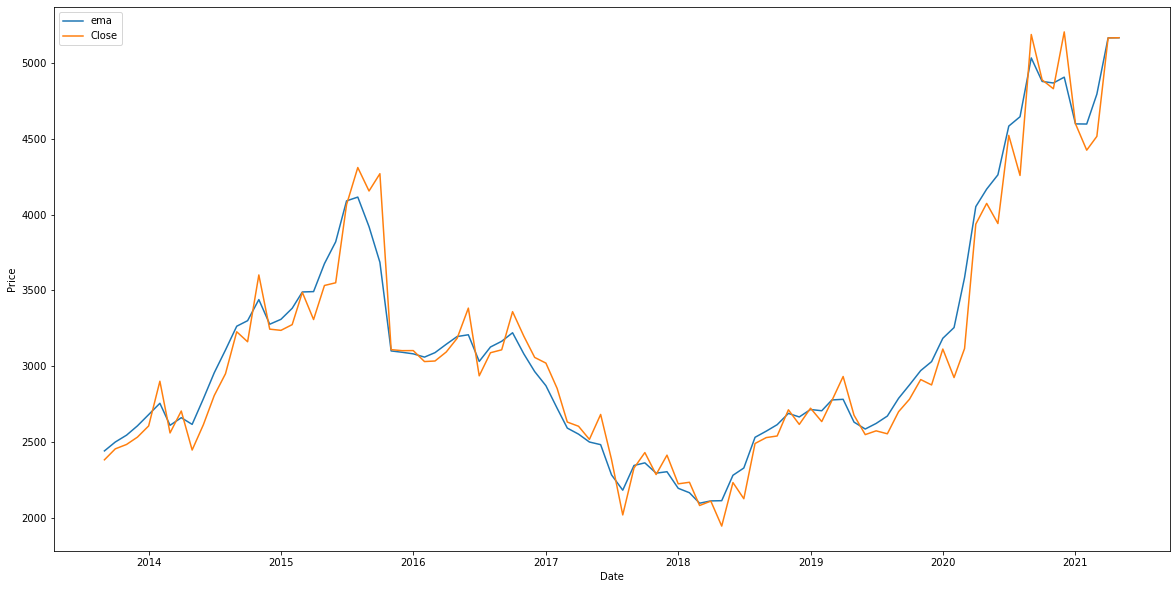

In [45]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(DR["Date"],DR["EMA"], label="ema")
plt.plot(DR["Date"],DR["Close*"], label="Close")
plt.legend()
#when both plot crossover indicate change of trend

In [46]:
# When Moving Average plot crossover with Close price plot its indicate change in trend

# Moving Average Convergence Divergence

In [47]:
exp1 = TS["Close*"].ewm(span=12, adjust=False).mean()
exp2 = TS["Close*"].ewm(span=26, adjust=False).mean()
TS["MACD"] = exp1 - exp2


In [48]:
TS.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104   
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514   
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635   
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897   
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703   

         SMA3          EMA       MACD  
0         NaN  1100.900000   0.000000  
1         NaN  1056.300000  -5.336752  
2  982.250000   916.614286 -27.178518  
3  853.666667   809.166667 -51.695246  
4  709.333333   701.725806 -79.420372

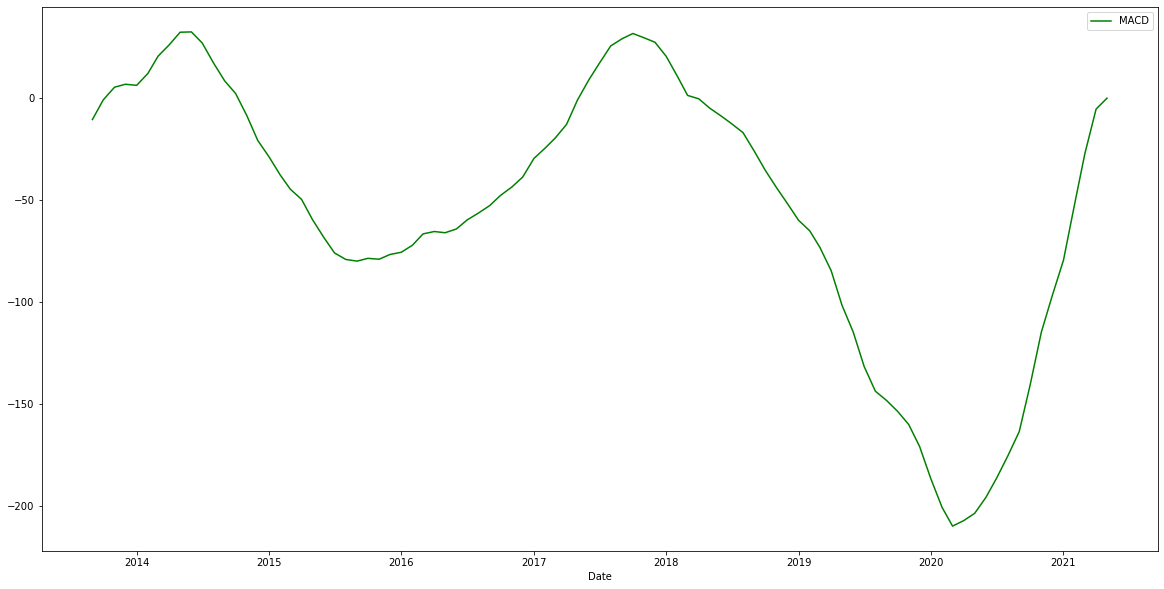

In [49]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.plot(TS["Date"],TS["MACD"], label="MACD",color='green')
plt.legend()

In [50]:
exp1 = RL["Close*"].ewm(span=12, adjust=False).mean()
exp2 = RL["Close*"].ewm(span=26, adjust=False).mean()
RL["MACD"] = exp1 - exp2


In [51]:
RL.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565   
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414   
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090   
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674   
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658   

      SMA3          EMA       MACD  
0      NaN  1931.000000   0.000000  
1      NaN  1973.333333   5.065527  
2  1976.20  1990.342857   9.662558  
3  2027.80  2041.253333  19.751257  
4  1976.95  1938.387097   7.978001

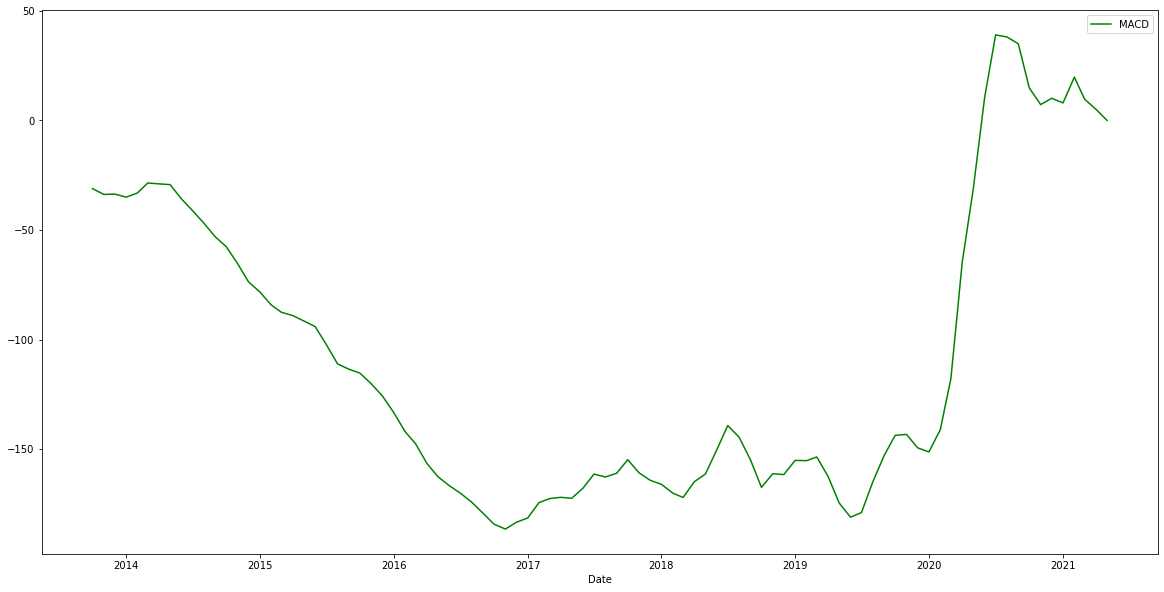

In [52]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.plot(RL["Date"],RL["MACD"], label="MACD",color='green')
plt.legend()

In [53]:
exp1 = DR["Close*"].ewm(span=12, adjust=False).mean()
exp2 = DR["Close*"].ewm(span=26, adjust=False).mean()
DR["MACD"] = exp1 - exp2

In [54]:
DR.head()

Date     Open     High      Low   Close* Adj. close**   Volume  \
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490   
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707   
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451   
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206   
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355   

          SMA3          EMA        MACD  
0          NaN  5165.650000    0.000000  
1          NaN  5164.750000   -0.107692  
2  4948.516667  4793.807143  -51.938988  
3  4701.500000  4596.896667  -99.214914  
4  4512.950000  4597.801613 -121.239473

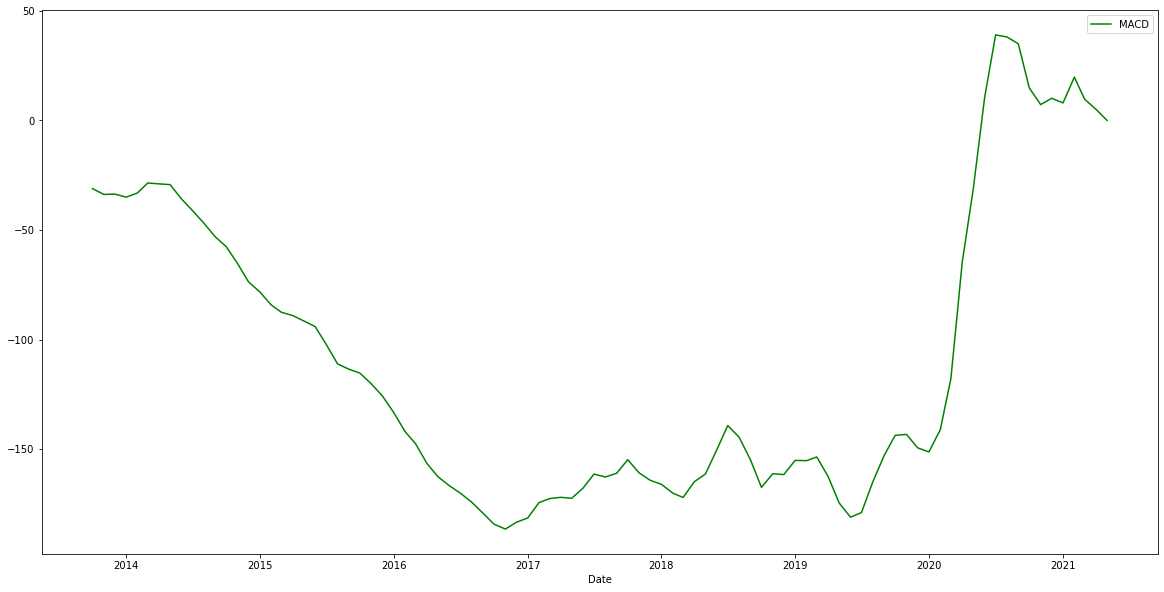

In [55]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.plot(RL["Date"],RL["MACD"], label="MACD",color='green')
plt.legend()

# 3 Relative Strength Index

In [56]:
TS['change'] = TS['Close*'].diff(1) # Calculate change

# calculate gain / loss from every change
TS['gain'] = np.select([TS['change']>0, TS['change'].isna()], 
                       [TS['change'], np.nan], 
                       default=0) 
TS['loss'] = np.select([TS['change']<0, TS['change'].isna()], 
                       [-TS['change'], np.nan], 
                       default=0)
TS.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104   
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514   
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635   
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897   
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703   

         SMA3          EMA       MACD  change  gain    loss  
0         NaN  1100.900000   0.000000     NaN   NaN     NaN  
1         NaN  1056.300000  -5.336752  -66.90   0.0   66.90  
2  982.250000   916.614286 -27.178518 -222.15   0.0  222.15  
3  853.666667   809.166667 -51.695246  -96.70   0.0   96.70  
4  709.333333   701.725806 -79.420372 -114.15   0.0  114.15

In [57]:
TS['avg_gain'] = TS['gain'].rolling(window=14).mean()
TS['avg_loss'] = TS['loss'].rolling(window=14).mean()

In [58]:
TS.head(20)

Date     Open     High      Low   Close* Adj. close**     Volume  \
0  2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104   
1  2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514   
2  2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635   
3  2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897   
4  2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703   
5  2020-12-01   592.00   653.50   576.95   643.65       643.65  358908203   
6  2020-11-01   410.00   582.35   398.70   577.35       577.35  461760748   
7  2020-10-01   364.30   426.00   362.50   410.55       410.55  375324103   
8  2020-09-01   413.90   443.65   342.75   359.75       359.75  320526533   
10 2020-08-01   364.75   442.00   362.05   413.00       402.57  344589191   
11 2020-07-01   329.00   378.45   320.30   366.30       357.05  310958628   
12 2020-06-01   302.00   350.80   300.00   326.70       318.45  367464788   
13 2020-05-01   298.30   298.60   262.45   295.20       287.74  242346826   
14 2020-04-01   266.00   304.50   251.00   298.30       290.76  281973896   
15 2020-03-01   393.70   394.00   250.85   269.60       262.79  405858418   
16 2020-02-01   431.50   487.25   375.00   381.75       372.10  285501434   
17 2020-01-01   473.00   506.00   436.45   438.70       427.62  272137707   
18 2019-12-01   424.95   476.30   389.00   472.05       460.12  354075114   
19 2019-11-01   380.05   434.30   378.00   427.50       416.70  375926811   
20 2019-10-01   362.00   399.70   320.35   380.55       370.94  282370514   

          SMA3          EMA        MACD  change    gain    loss   avg_gain  \
0          NaN  1100.900000    0.000000     NaN     NaN     NaN        NaN   
1          NaN  1056.300000   -5.336752  -66.90    0.00   66.90        NaN   
2   982.250000   916.614286  -27.178518 -222.15    0.00  222.15        NaN   
3   853.666667   809.166667  -51.695246  -96.70    0.00   96.70        NaN   
4   709.333333   701.725806  -79.420372 -114.15    0.00  114.15        NaN   
5   653.266667   672.226984  -96.834982   42.65   42.65    0.00        NaN   
6   607.333333   624.414961 -114.664264  -66.30    0.00   66.30        NaN   
7   543.850000   517.063137 -140.632342 -166.80    0.00  166.80        NaN   
8   449.216667   438.252642 -163.427476  -50.80    0.00   50.80        NaN   
10  394.433333   425.613978 -175.176627   53.25   53.25    0.00        NaN   
11  379.683333   395.942501 -186.110844  -46.70    0.00   46.70        NaN   
12  368.666667   361.312796 -195.715591  -39.60    0.00   39.60        NaN   
13  329.400000   328.252362 -203.523121  -31.50    0.00   31.50        NaN   
14  306.733333   313.275267 -207.073486    3.10    3.10    0.00        NaN   
15  287.700000   291.436967 -209.784758  -28.70    0.00   28.70   7.071429   
16  316.550000   336.594173 -200.571826  112.15  112.15    0.00  15.082143   
17  363.350000   387.647476 -186.524978   56.95   56.95    0.00  19.150000   
18  430.833333   429.848899 -170.733574   33.35   33.35    0.00  21.532143   
19  446.083333   428.674447 -159.969555  -44.55    0.00   44.55  21.532143   
20  426.700000   404.612201 -153.458491  -46.95    0.00   46.95  18.485714   

     avg_loss  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
10        NaN  
11        NaN  
12        NaN  
13        NaN  
14        NaN  
15  66.450000  
16  61.671429  
17  45.803571  
18  38.896429  
19  33.925000  
20  37.278571

In [59]:
TS['rs'] = TS['avg_gain'] / TS['avg_loss']
TS['rsi'] = 100 - (100 / (1 + TS['rs'] ))
TS.tail()

Date    Open    High     Low  Close* Adj. close**     Volume  \
95 2014-01-01  404.91  414.92  325.07  339.22       289.62   89915865   
96 2013-12-01  381.19  411.53  377.28  404.15       345.06   90609345   
97 2013-11-01  319.17  386.24  315.98  381.67       325.86  137634968   
98 2013-10-01  261.29  327.65  256.14  319.07       272.42  141870545   
99 2013-09-01  262.05  303.73  253.57  258.72       220.89  140100970   

          SMA3         EMA       MACD  change   gain   loss   avg_gain  \
95  347.366667  352.018668   6.295649   11.67  11.67   0.00  19.044286   
96  356.973333  378.084334   6.836840   64.93  64.93   0.00  21.375000   
97  375.013333  379.877167   5.389661  -22.48   0.00  22.48  18.666429   
98  368.296667  349.473584  -0.799321  -62.60   0.00  62.60  18.057857   
99  319.820000  304.096792 -10.453375  -60.35   0.00  60.35  13.025000   

     avg_loss        rs        rsi  
95  16.370000  1.163365  53.775716  
96  16.370000  1.305742  56.630017  
97  17.975714  1.038425  50.942513  
98  22.447143  0.804461  44.581798  
99  26.757857  0.486773  32.740233

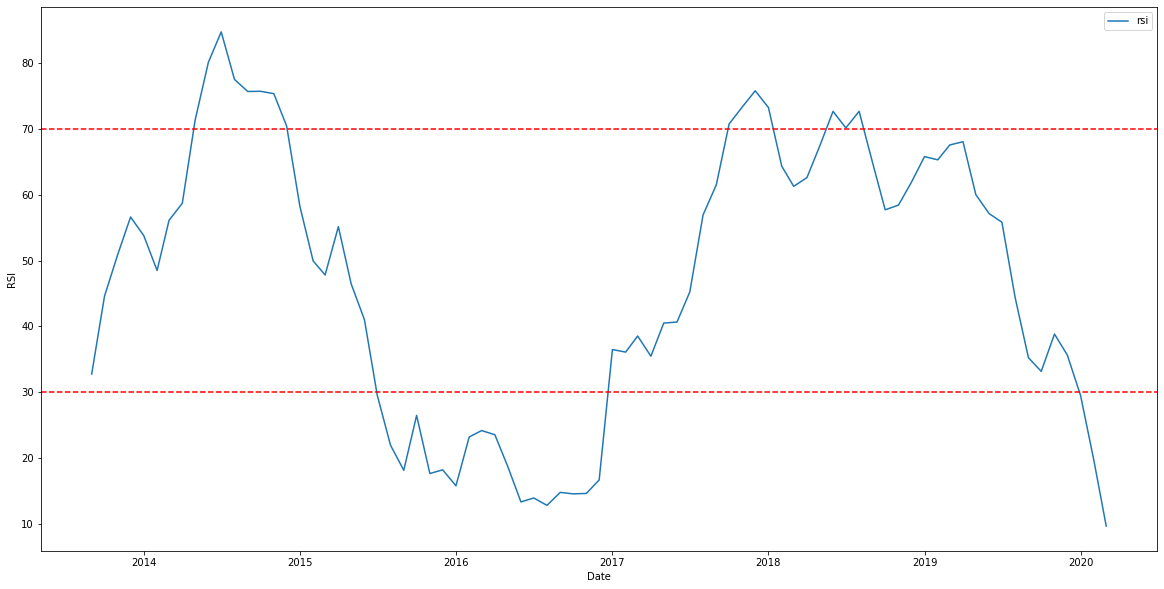

In [60]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("RSI")
plt.plot(TS["Date"],TS["rsi"], label="rsi")
plt.axhline(30, color='r', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.legend()

In [61]:
RL['change'] = RL['Close*'].diff(1) # Calculate change

# calculate gain / loss from every change
RL['gain'] = np.select([RL['change']>0, RL['change'].isna()], 
                       [RL['change'], np.nan], 
                       default=0) 
RL['loss'] = np.select([RL['change']<0, RL['change'].isna()], 
                       [-RL['change'], np.nan], 
                       default=0)
RL.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565   
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414   
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090   
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674   
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658   

      SMA3          EMA       MACD  change  gain    loss  
0      NaN  1931.000000   0.000000     NaN   NaN     NaN  
1      NaN  1973.333333   5.065527   63.50  63.5    0.00  
2  1976.20  1990.342857   9.662558    8.60   8.6    0.00  
3  2027.80  2041.253333  19.751257   82.70  82.7    0.00  
4  1976.95  1938.387097   7.978001 -243.85   0.0  243.85

In [62]:
RL['avg_gain'] = RL['gain'].rolling(window=14).mean()
RL['avg_loss'] = RL['loss'].rolling(window=14).mean()

In [63]:
RL.head(20)

Date     Open     High      Low   Close* Adj. close**     Volume  \
0  2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565   
1  2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414   
2  2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090   
3  2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674   
4  2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658   
5  2020-12-01  1940.35  2038.00  1855.25  1985.30      1985.30  232769277   
6  2020-11-01  2027.00  2095.00  1835.10  1929.80      1929.80  432225361   
7  2020-10-01  2263.80  2309.00  1991.00  2054.50      2054.50  259827270   
8  2020-09-01  2100.00  2369.35  2044.25  2234.35      2234.35  378761955   
9  2020-08-01  2051.30  2196.00  2000.25  2080.70      2080.70  383255989   
11 2020-07-01  1720.00  2198.80  1708.05  2067.10      2059.37  616536793   
12 2020-06-01  1480.00  1804.20  1475.95  1704.10      1697.73  397672706   
13 2020-05-01  1452.23  1599.84  1393.00  1464.40      1458.92  463908941   
14 2020-04-01  1111.71  1480.91  1035.39  1452.23      1446.80  478245980   
15 2020-03-01  1342.38  1356.15   867.43  1103.29      1099.16  459269330   
16 2020-02-01  1392.10  1493.84  1312.56  1316.17      1311.25  185522260   
17 2020-01-01  1503.75  1593.89  1393.99  1398.39      1393.16  201733860   
18 2019-12-01  1584.98  1602.36  1493.89  1499.83      1494.22  173093325   
19 2019-11-01  1441.34  1569.27  1409.19  1536.58      1530.84  168624156   
20 2019-10-01  1324.45  1475.66  1269.27  1450.60      1445.17  165829075   

           SMA3          EMA        MACD  change    gain    loss   avg_gain  \
0           NaN  1931.000000    0.000000     NaN     NaN     NaN        NaN   
1           NaN  1973.333333    5.065527   63.50   63.50    0.00        NaN   
2   1976.200000  1990.342857    9.662558    8.60    8.60    0.00        NaN   
3   2027.800000  2041.253333   19.751257   82.70   82.70    0.00        NaN   
4   1976.950000  1938.387097    7.978001 -243.85    0.00  243.85        NaN   
5   1971.016667  1962.215873   10.098350  143.35  143.35    0.00        NaN   
6   1919.016667  1945.880315    7.217161  -55.50    0.00   55.50        NaN   
7   1989.866667  2000.403137   14.825150  124.70  124.70    0.00        NaN   
8   2072.883333  2117.605479   34.963887  179.85  179.85    0.00        NaN   
9   2123.183333  2099.134702   38.086671 -153.65    0.00  153.65        NaN   
11  2127.383333  2083.109526   39.014359  -13.60    0.00   13.60        NaN   
12  1950.633333  1893.558486   10.339308 -363.00    0.00  363.00        NaN   
13  1745.200000  1678.953046  -31.366094 -239.70    0.00  239.70        NaN   
14  1540.243333  1565.584604  -64.654645  -12.17    0.00   12.17        NaN   
15  1339.973333  1334.430248 -117.834283 -348.94    0.00  348.94  43.050000   
16  1290.563333  1325.299984 -141.174521  212.88  212.88    0.00  53.720000   
17  1272.616667  1361.845271 -151.293344   82.22   82.22    0.00  58.978571   
18  1404.796667  1430.837899 -149.404977  101.44  101.44    0.00  60.317143   
19  1478.266667  1483.709050 -143.291243   36.75   36.75    0.00  62.942143   
20  1495.670000  1467.154509 -143.727135  -85.98    0.00   85.98  52.702857   

      avg_loss  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN  
11         NaN  
12         NaN  
13         NaN  
14         NaN  
15  102.172143  
16  102.172143  
17  102.172143  
18  102.172143  
19   84.754286  
20   90.895714

In [64]:
RL['rs'] = RL['avg_gain'] / RL['avg_loss']
RL['rsi'] = 100 - (100 / (1 + RL['rs'] ))
RL.tail()

Date    Open    High     Low  Close* Adj. close**     Volume  \
95 2014-02-01  409.22  411.00  392.83  396.22       375.52   84666249   
96 2014-01-01  444.51  444.91  407.24  411.67       390.16  130829046   
97 2013-12-01  422.50  450.23  414.45  443.40       420.23   98765258   
98 2013-11-01  450.78  458.92  413.70  422.59       400.51   91816427   
99 2013-10-01  409.27  454.69  405.01  453.06       429.38  125905292   

          SMA3         EMA       MACD  change   gain   loss   avg_gain  \
95  440.246667  435.337973 -33.091444  -64.79   0.00  64.79  11.238571   
96  422.966667  423.503987 -35.030291   15.45  15.45   0.00  12.342143   
97  417.096667  433.451993 -33.618958   31.73  31.73   0.00  13.562857   
98  425.886667  428.020997 -33.790147  -20.81   0.00  20.81  11.450714   
99  439.683333  440.540498 -31.108541   30.47  30.47   0.00  13.627143   

     avg_loss        rs        rsi  
95  13.446429  0.835803  45.527938  
96  12.160000  1.014979  50.371688  
97  12.160000  1.115367  52.726869  
98  13.646429  0.839100  45.625569  
99  12.793571  1.065155  51.577496

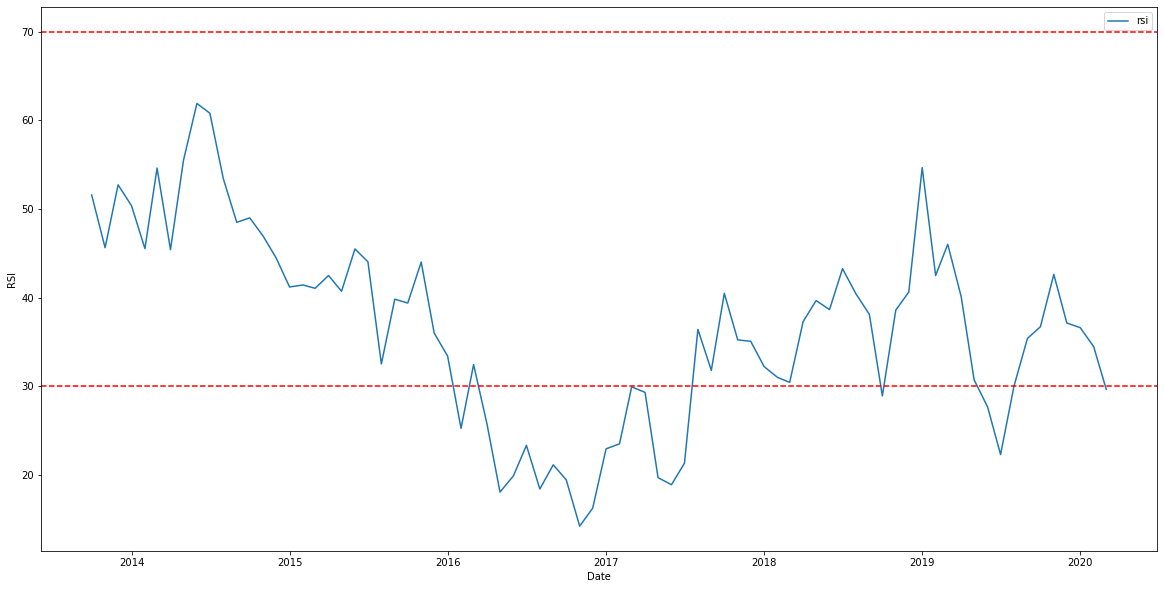

In [65]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("RSI")
plt.plot(RL["Date"],RL["rsi"], label="rsi")
plt.axhline(30, color='r', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.legend()

In [66]:
DR['change'] = DR['Close*'].diff(1) # Calculate change

# calculate gain / loss from every change
DR['gain'] = np.select([DR['change']>0, DR['change'].isna()], 
                       [DR['change'], np.nan], 
                       default=0) 
DR['loss'] = np.select([DR['change']<0, DR['change'].isna()], 
                       [-DR['change'], np.nan], 
                       default=0)
DR.head()

Date     Open     High      Low   Close* Adj. close**   Volume  \
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490   
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707   
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451   
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206   
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355   

          SMA3          EMA        MACD  change    gain    loss  
0          NaN  5165.650000    0.000000     NaN     NaN     NaN  
1          NaN  5164.750000   -0.107692   -1.35    0.00    1.35  
2  4948.516667  4793.807143  -51.938988 -648.70    0.00  648.70  
3  4701.500000  4596.896667  -99.214914  -91.00    0.00   91.00  
4  4512.950000  4597.801613 -121.239473  174.05  174.05    0.00

In [67]:
DR['avg_gain'] = DR['gain'].rolling(window=14).mean()
DR['avg_loss'] = DR['loss'].rolling(window=14).mean()

In [68]:
DR.head(20)

Date     Open     High      Low   Close* Adj. close**   Volume  \
0  2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490   
1  2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707   
2  2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451   
3  2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206   
4  2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355   
5  2020-12-01  4861.15  5273.95  4805.90  5204.10      5204.10  1013600   
6  2020-11-01  4904.45  5018.70  4658.80  4829.60      4829.60  1041579   
7  2020-10-01  5215.00  5321.05  4832.40  4887.95      4887.95  1338160   
8  2020-09-01  4240.00  5514.65  4233.85  5187.05      5187.05  2522272   
9  2020-08-01  4522.00  4754.30  4230.10  4257.90      4257.90   823335   
11 2020-07-01  3957.45  4558.70  3815.80  4521.90      4492.96   973115   
12 2020-06-01  4072.10  4189.35  3888.40  3941.00      3915.77   640277   
13 2020-05-01  3937.20  4099.90  3613.45  4073.80      4047.72   664811   
14 2020-04-01  3180.00  4095.00  3027.55  3937.20      3912.00   746155   
15 2020-03-01  3018.90  3230.00  2497.60  3117.10      3097.15  1036617   
16 2020-02-01  3116.00  3363.00  2906.00  2925.80      2907.07   475805   
17 2020-01-01  2888.35  3249.50  2851.90  3113.75      3093.82  1082543   
18 2019-12-01  2901.35  2969.00  2774.00  2877.15      2858.73   241923   
19 2019-11-01  2783.00  2990.00  2712.65  2912.60      2893.96   422042   
20 2019-10-01  2686.15  2850.00  2577.20  2782.85      2765.04   254347   

           SMA3          EMA        MACD  change    gain    loss    avg_gain  \
0           NaN  5165.650000    0.000000     NaN     NaN     NaN         NaN   
1           NaN  5164.750000   -0.107692   -1.35    0.00    1.35         NaN   
2   4948.516667  4793.807143  -51.938988 -648.70    0.00  648.70         NaN   
3   4701.500000  4596.896667  -99.214914  -91.00    0.00   91.00         NaN   
4   4512.950000  4597.801613 -121.239473  174.05  174.05    0.00         NaN   
5   4742.450000  4905.762698  -88.815529  605.45  605.45    0.00         NaN   
6   4877.450000  4867.381496  -92.274656 -374.50    0.00  374.50         NaN   
7   4973.883333  4877.706078  -89.278534   58.35   58.35    0.00         NaN   
8   4968.200000  5032.680724  -62.053896  299.10  299.10    0.00         NaN   
9   4777.633333  4644.911681 -114.137113 -929.15    0.00  929.15         NaN   
11  4655.616667  4583.375794 -132.582516  264.00  264.00    0.00         NaN   
12  4240.266667  4262.109463 -191.862731 -580.90    0.00  580.90         NaN   
13  4178.900000  4167.943236 -225.527142  132.80  132.80    0.00         NaN   
14  3984.000000  4052.564576 -260.229149 -136.60    0.00  136.60         NaN   
15  3709.366667  3584.818014 -349.872839 -820.10    0.00  820.10  109.553571   
16  3326.700000  3255.303979 -431.379744 -191.30    0.00  191.30  109.553571   
17  3052.216667  3184.526449 -475.329259  187.95  187.95    0.00  122.978571   
18  2972.233333  3030.837638 -523.219856 -236.60    0.00  236.60  122.978571   
19  2967.833333  2971.718706 -551.950440   35.45   35.45    0.00  113.078571   
20  2857.533333  2877.284263 -578.520550 -129.75    0.00  129.75   69.832143   

      avg_loss  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN  
11         NaN  
12         NaN  
13         NaN  
14         NaN  
15  255.878571  
16  269.446429  
17  223.110714  
18  233.510714  
19  233.510714  
20  242.778571

In [69]:
DR['rs'] = DR['avg_gain'] / DR['avg_loss']
DR['rsi'] = 100 - (100 / (1 + DR['rs'] ))
DR.tail()

Date     Open     High      Low   Close* Adj. close**  Volume  \
95 2014-01-01  2534.00  2690.00  2460.00  2607.00      2485.00  388446   
96 2013-12-01  2484.00  2554.00  2393.15  2533.05      2414.51  216118   
97 2013-11-01  2445.00  2498.70  2313.00  2484.85      2368.57  307521   
98 2013-10-01  2395.65  2545.00  2350.00  2455.95      2341.02  561434   
99 2013-09-01  2272.00  2471.70  2161.00  2383.65      2272.10  438526   

           SMA3          EMA        MACD  change  gain    loss   avg_gain  \
95  2689.783333  2681.644851 -160.588644 -294.55   0.0  294.55  73.503571   
96  2680.533333  2607.347425 -175.435572  -73.95   0.0   73.95  73.503571   
97  2541.633333  2546.098713 -188.913530  -48.20   0.0   48.20  73.503571   
98  2491.283333  2501.024356 -199.625735  -28.90   0.0   28.90  72.935714   
99  2441.483333  2442.337178 -211.511073  -72.30   0.0   72.30  47.421429   

      avg_loss        rs        rsi  
95  136.392857  0.538911  35.018972  
96  126.478571  0.581154  36.755067  
97  127.228571  0.577728  36.617739  
98  129.292857  0.564112  36.065979  
99  134.457143  0.352688  26.073126

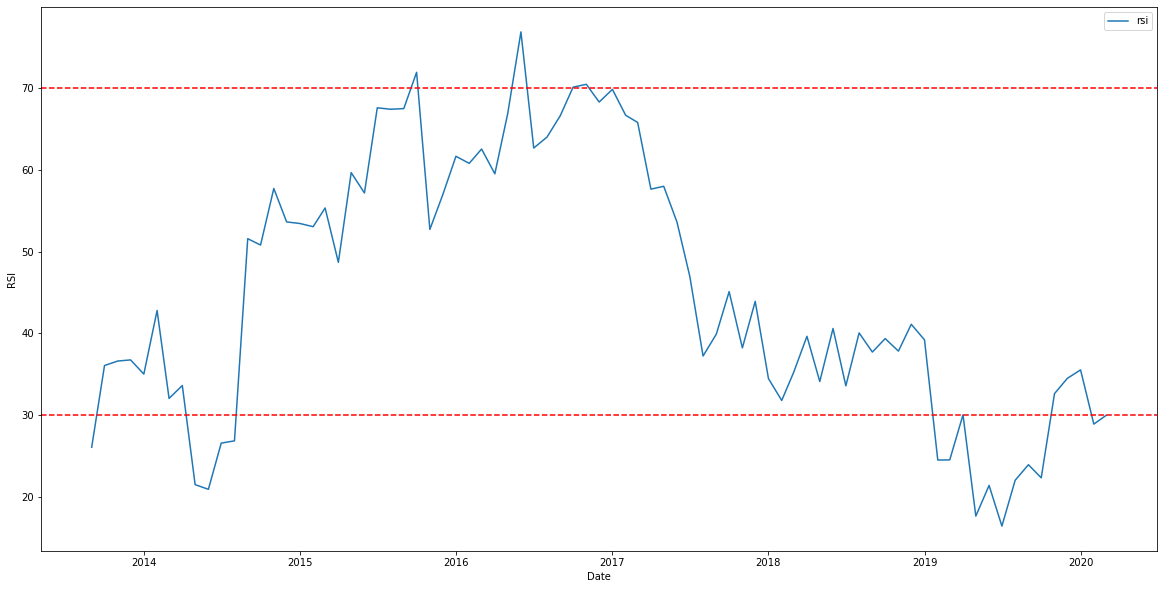

In [70]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("RSI")
plt.plot(DR["Date"],DR["rsi"], label="rsi")
plt.axhline(30, color='r', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.legend()

In [71]:
# RSI surpasses the horizontal 30 reference level, it is a bullish sign and when it slides below the horizontal 70 reference level, it is a bearish sign. Put another way, one can intepret RSI values of 70 or above indicate a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition.

# 4 On Balance Volume

In [72]:
TS["Volume"]=TS["Volume"].astype(float)
TS["OBV"]=(np.sign(TS['Close*'].diff()) * TS['Volume']).fillna(0).cumsum()
TS.head()

Date     Open     High      Low   Close* Adj. close**       Volume  \
0 2021-05-01  1031.95  1129.00  1018.50  1100.90      1100.90  117130104.0   
1 2021-04-01   821.00  1052.60   819.00  1034.00      1034.00  504524514.0   
2 2021-03-01   724.00   823.50   681.25   811.85       811.85  420184635.0   
3 2021-02-01   604.90   753.00   597.45   715.15       715.15  471314897.0   
4 2021-01-01   645.00   731.50   596.00   601.00       601.00  433068703.0   

         SMA3          EMA       MACD  change  gain    loss  avg_gain  \
0         NaN  1100.900000   0.000000     NaN   NaN     NaN       NaN   
1         NaN  1056.300000  -5.336752  -66.90   0.0   66.90       NaN   
2  982.250000   916.614286 -27.178518 -222.15   0.0  222.15       NaN   
3  853.666667   809.166667 -51.695246  -96.70   0.0   96.70       NaN   
4  709.333333   701.725806 -79.420372 -114.15   0.0  114.15       NaN   

   avg_loss  rs  rsi           OBV  
0       NaN NaN  NaN  0.000000e+00  
1       NaN NaN  NaN -5.045245e+08  
2       NaN NaN  NaN -9.247091e+08  
3       NaN NaN  NaN -1.396024e+09  
4       NaN NaN  NaN -1.829093e+09

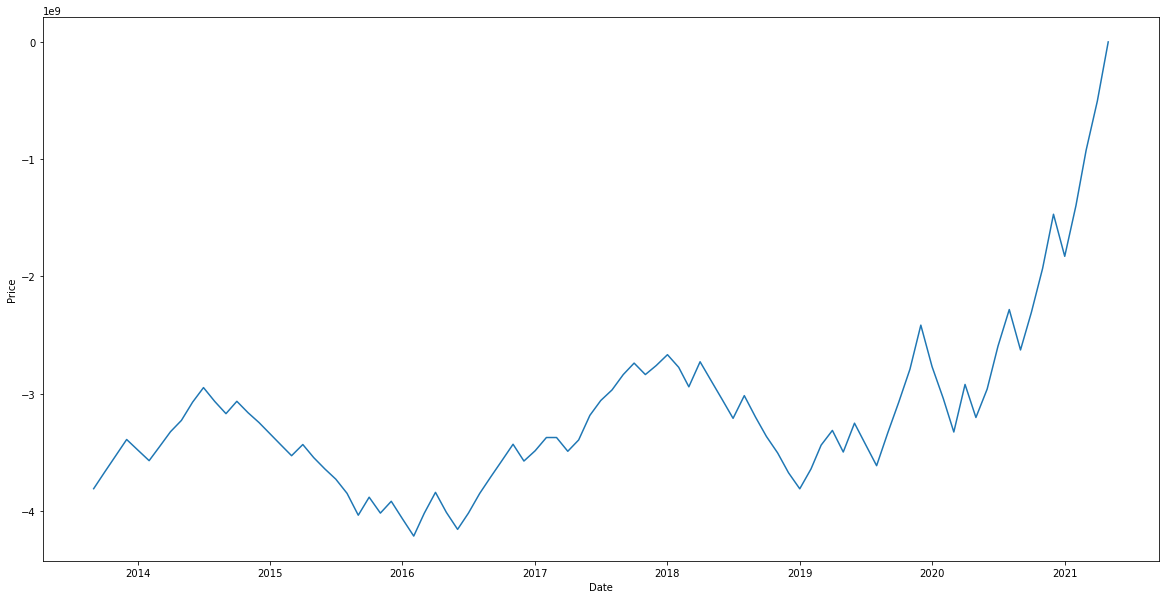

In [73]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(TS["Date"],TS["OBV"], label="rsi")

In [74]:
RL["Volume"]=RL["Volume"].astype(float)
RL["OBV"]=(np.sign(TS['Close*'].diff()) * RL['Volume']).fillna(0).cumsum()
RL.head()

Date     Open     High      Low   Close* Adj. close**       Volume  \
0 2021-05-01  1966.00  1979.00  1906.60  1931.00      1931.00   33462565.0   
1 2021-04-01  2018.00  2046.90  1876.70  1994.50      1994.50  150993414.0   
2 2021-03-01  2110.20  2231.90  1973.70  2003.10      2003.10  194133090.0   
3 2021-02-01  1859.40  2152.00  1848.00  2085.80      2085.80  241126674.0   
4 2021-01-01  1988.00  2120.00  1830.00  1841.95      1841.95  300050658.0   

      SMA3          EMA       MACD  change  gain    loss  avg_gain  avg_loss  \
0      NaN  1931.000000   0.000000     NaN   NaN     NaN       NaN       NaN   
1      NaN  1973.333333   5.065527   63.50  63.5    0.00       NaN       NaN   
2  1976.20  1990.342857   9.662558    8.60   8.6    0.00       NaN       NaN   
3  2027.80  2041.253333  19.751257   82.70  82.7    0.00       NaN       NaN   
4  1976.95  1938.387097   7.978001 -243.85   0.0  243.85       NaN       NaN   

   rs  rsi          OBV  
0 NaN  NaN          0.0  
1 NaN  NaN -150993414.0  
2 NaN  NaN -345126504.0  
3 NaN  NaN -586253178.0  
4 NaN  NaN -886303836.0

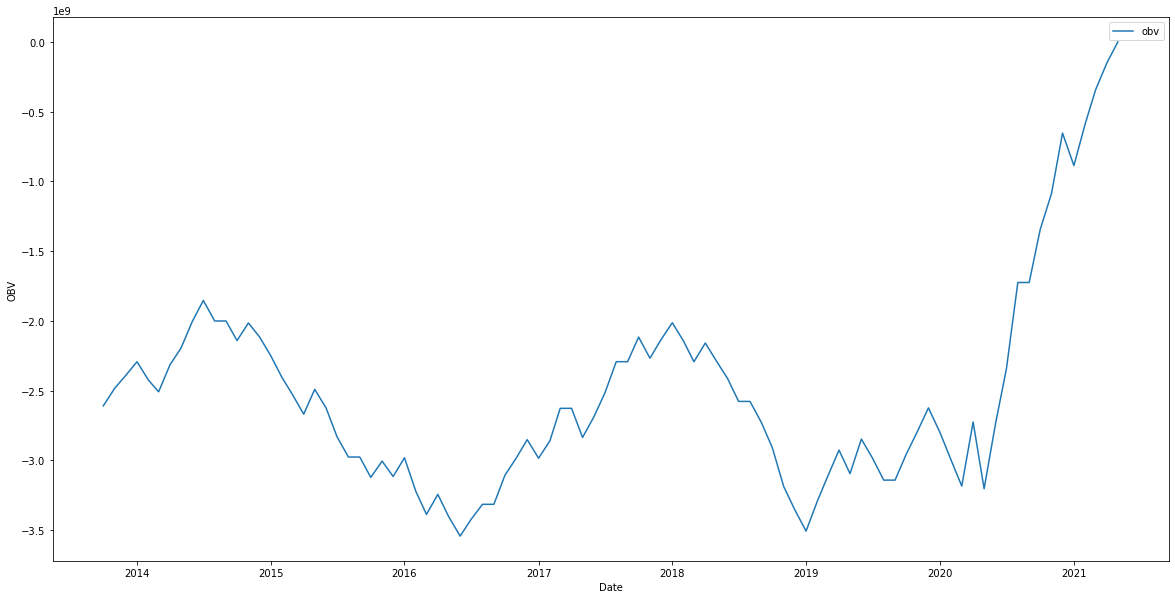

In [75]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("OBV")
plt.plot(RL["Date"],RL["OBV"], label="obv")
plt.legend()

In [76]:
DR["Volume"]=DR["Volume"].astype(float)
DR["OBV"]=(np.sign(DR['Close*'].diff()) * DR['Volume']).fillna(0).cumsum()
DR.head()

Date     Open     High      Low   Close* Adj. close**     Volume  \
0 2021-05-01  5200.00  5250.80  5055.75  5165.65      5165.65   211490.0   
1 2021-04-01  4535.00  5290.00  4423.20  5164.30      5164.30  1517707.0   
2 2021-03-01  4478.90  4582.85  4135.90  4515.60      4515.60   805451.0   
3 2021-02-01  4577.20  4909.30  4261.00  4424.60      4424.60  1524206.0   
4 2021-01-01  5228.00  5443.35  4550.00  4598.65      4598.65   841355.0   

          SMA3          EMA        MACD  change    gain    loss  avg_gain  \
0          NaN  5165.650000    0.000000     NaN     NaN     NaN       NaN   
1          NaN  5164.750000   -0.107692   -1.35    0.00    1.35       NaN   
2  4948.516667  4793.807143  -51.938988 -648.70    0.00  648.70       NaN   
3  4701.500000  4596.896667  -99.214914  -91.00    0.00   91.00       NaN   
4  4512.950000  4597.801613 -121.239473  174.05  174.05    0.00       NaN   

   avg_loss  rs  rsi        OBV  
0       NaN NaN  NaN        0.0  
1       NaN NaN  NaN -1517707.0  
2       NaN NaN  NaN -2323158.0  
3       NaN NaN  NaN -3847364.0  
4       NaN NaN  NaN -3006009.0

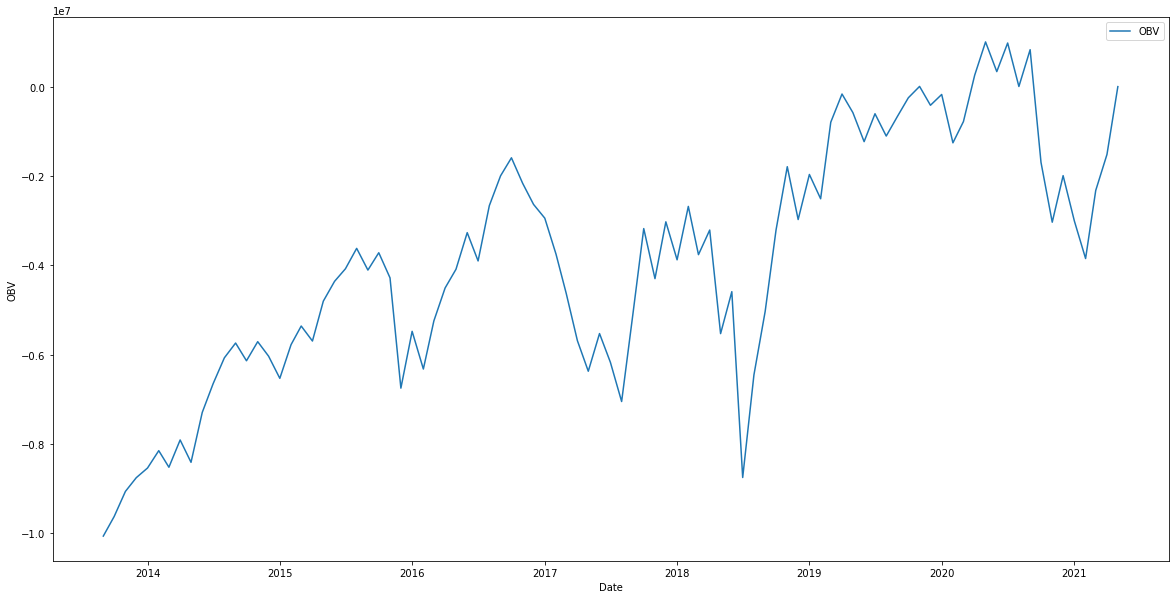

In [77]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("OBV")
plt.plot(DR["Date"],DR["OBV"], label="OBV")
plt.legend()

# 5 OLHC 

In [78]:
fig = go.Figure(data=go.Ohlc(x=TS['Date'],
                    open=TS['Open'],
                    high=TS['High'],
                    low=TS['Low'],
                    close=TS['Close*']))
fig.show()

In [79]:
fig = go.Figure(data=go.Ohlc(x=RL['Date'],
                    open=RL['Open'],
                    high=RL['High'],
                    low=RL['Low'],
                    close=RL['Close*']))
fig.show()

In [80]:
fig = go.Figure(data=go.Ohlc(x=DR['Date'],
                    open=DR['Open'],
                    high=DR['High'],
                    low=DR['Low'],
                    close=DR['Close*']))
fig.show()

# Stock Market Prediction using Linear Regression 

In [81]:
train = TS[:80]
valid = TS[80:]

x_train = train.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
x_train["Date"]= pd.to_numeric(x_train['Date'])
y_train = train['Close*']
x_valid = valid.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
y_valid = valid['Close*']
x_valid["Date"]= pd.to_numeric(x_valid['Date'])
#implement linear regression

model = LinearRegression()
model.fit(x_train,y_train)

preds = model.predict(x_valid)
mse=mean_squared_error(y_valid, preds)
rmse=np.sqrt(mse)
print(rmse)

10.018130112908969


In [82]:
train = RL[:80]
valid = RL[80:]

x_train = train.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
x_train["Date"]= pd.to_numeric(x_train['Date'])
y_train = train['Close*']
x_valid = valid.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
y_valid = valid['Close*']
x_valid["Date"]= pd.to_numeric(x_valid['Date'])
#implement linear regression

model = LinearRegression()
model.fit(x_train,y_train)

preds = model.predict(x_valid)
mse=mean_squared_error(y_valid, preds)
rmse=np.sqrt(mse)
print(rmse)

4.226556464535337


In [83]:
train = DR[:80]
valid = DR[80:]

x_train = train.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
x_train["Date"]= pd.to_numeric(x_train['Date'])
y_train = train['Close*']
x_valid = valid.drop(['Close*','SMA3','EMA','MACD','change','gain','loss','avg_gain','avg_loss','rs','rsi','OBV'], axis=1)
y_valid = valid['Close*']
x_valid["Date"]= pd.to_numeric(x_valid['Date'])
#implement linear regression

model = LinearRegression()
model.fit(x_train,y_train)

preds = model.predict(x_valid)
mse=mean_squared_error(y_valid, preds)
rmse=np.sqrt(mse)
print(rmse)

37.64557980851375
